<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/thesis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = "/content/drive/MyDrive/Dataset_epiliptic_seizure/"
num_classes = 2

In [3]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.1
)

train_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'training',
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'validation',
    class_mode = 'binary'

)

Found 560 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [4]:
input_shape = train_gen.image_shape
input_shape

(125, 125, 3)

In [5]:
model = Sequential([
                    Conv2D(16,(6,6),
                            strides=2,
                            activation="relu",
                            padding='same',
                            input_shape=input_shape),
                    MaxPooling2D(pool_size = 2),
                    Dropout(0.5),
                    Conv2D(32,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 2),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 2),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 2),
                    Dropout(0.5),
                    Flatten(),
                    Dense(128,activation = 'relu'),
                    Dropout(0.5),
                    Dense(2,activation = 'softmax')
                    
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 16)        1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0

In [7]:
from keras.callbacks import EarlyStopping

In [8]:
callback_list = EarlyStopping(monitor = 'val_loss',
                              patience = 20,
                              restore_best_weights=True)

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])

In [10]:
Epoch = 100
batchSize = 32

history = model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    callbacks=[callback_list],
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/100
19/19 [==============================] - 7s 348ms/step - loss: 1.3314 - accuracy: 0.4625 - val_loss: 0.6903 - val_accuracy: 0.5082
Epoch 2/100
19/19 [==============================] - 6s 328ms/step - loss: 0.9026 - accuracy: 0.5054 - val_loss: 0.6899 - val_accuracy: 0.5246
Epoch 3/100
19/19 [==============================] - 6s 329ms/step - loss: 0.8672 - accuracy: 0.4643 - val_loss: 0.6907 - val_accuracy: 0.5410
Epoch 4/100
19/19 [==============================] - 6s 329ms/step - loss: 0.7763 - accuracy: 0.5268 - val_loss: 0.6911 - val_accuracy: 0.7213
Epoch 5/100
19/19 [==============================] - 6s 322ms/step - loss: 0.7421 - accuracy: 0.5161 - val_loss: 0.6902 - val_accuracy: 0.5902
Epoch 6/100
19/19 [==============================] - 6s 324ms/step - loss: 0.7374 - accuracy: 0.5250 - val_loss: 0.6903 - val_accuracy: 0.7869
Epoch 7/100
19/19 [==============================] - 6s 325ms/step - loss: 0.7321 - accuracy: 0.4679 - val_loss: 0.6907 - val_accuracy: 0.5246

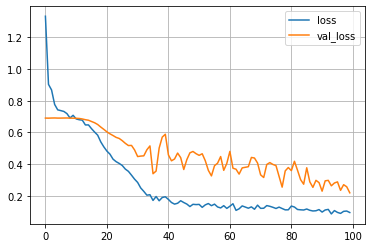

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

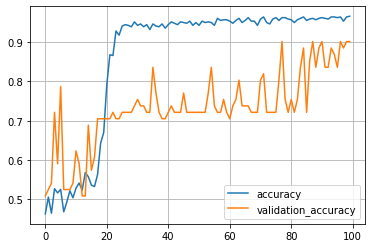

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.grid()
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = []
for key in train_gen.class_indices:
    target_names.append(key)
y_pred = model.predict_generator(valid_gen)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_gen.classes, y_pred)
print (cm)
print('Classification Report')
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Confusion Matrix
[[17 13]
 [ 7 24]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.71      0.57      0.63        30
     Seizure       0.65      0.77      0.71        31

    accuracy                           0.67        61
   macro avg       0.68      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61



Text(0.5, 1.0, 'Confusion Matrix - 0: Normal & 1: Seizure')

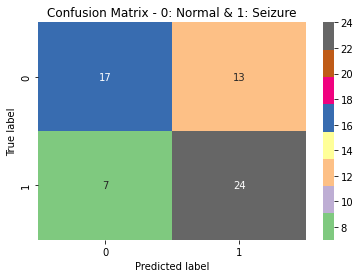

In [39]:
import seaborn as sns
conf_mat = confusion_matrix(valid_gen.classes, y_pred)
sns.heatmap(conf_mat, annot = True , cmap = 'Accent')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt. title ('Confusion Matrix - 0: Normal & 1: Seizure')

In [44]:
model.save('EEG.h5')